In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, load_img

In [17]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/Happy_or_sad/data'
happy_dir = os.path.join(base_dir, 'happy/')
sad_dir = os.path.join(base_dir, 'sad/')

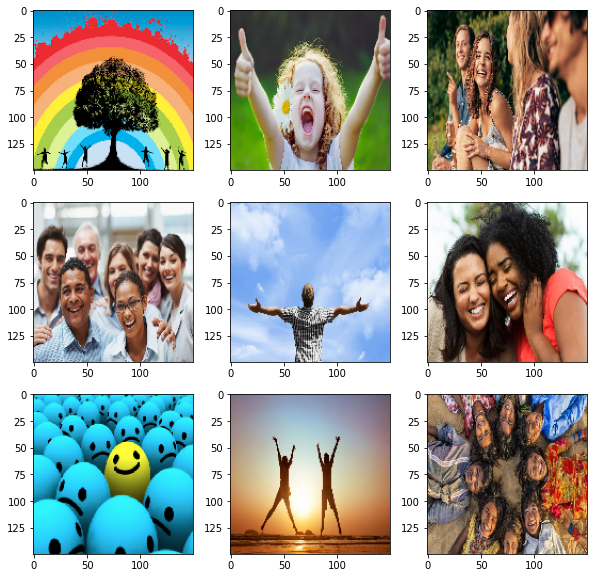

In [35]:
def plot_exp(dir) :
    plt.figure(figsize= (10,10))
    for i in range(1,10):
        k = np.random.randint(70)
        plt.subplot(3,3,i)
        img = load_img(dir + os.listdir(dir)[k], target_size=(150,150))
        plt.imshow(img)   
    plt.show()

plot_exp(happy_dir)

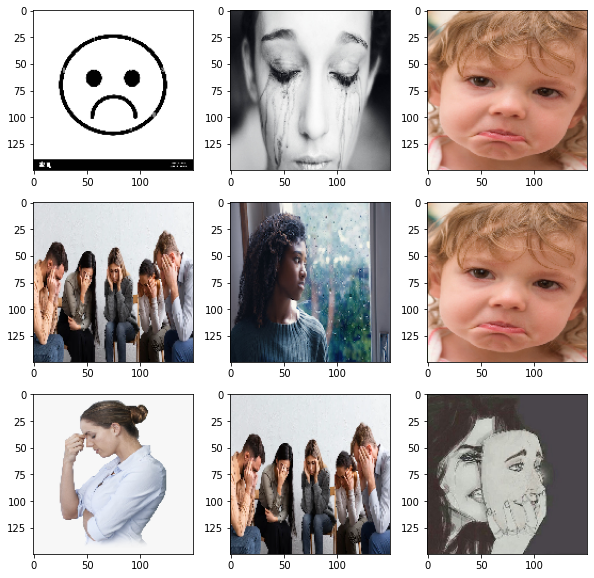

In [37]:
plot_exp(sad_dir)

In [40]:
train_datagen = ImageDataGenerator(rescale=1/255.0,
                                   rotation_range = 60,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest',
                                   validation_split = 0.2)
train_generator = train_datagen.flow_from_directory(base_dir,
                                                    batch_size = 8,
                                                    class_mode = 'binary',
                                                    subset = 'training',
                                                    seed = 42,
                                                    target_size = (200,200))

validation_generator = train_datagen.flow_from_directory(base_dir,
                                                              batch_size= 8,
                                                              class_mode = 'binary',
                                                              subset = 'validation',
                                                              seed = 42,
                                                              target_size = (200,200),
                                                              shuffle = False)

Found 134 images belonging to 2 classes.
Found 33 images belonging to 2 classes.


In [41]:
class Mycallback(tf.keras.callbacks.Callback):
  def end_on_epoch(self, epoch, logs={}):
    if logs.get('accuracy') >= 0.98 :
      print('\nReached 98% accuracy cancel training')
      self.model.stop_training = True

In [56]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
                loss = 'binary_crossentropy', 
                metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 23, 23, 64)     

In [58]:
callbacks = Mycallback()

In [61]:
history = model.fit(train_generator, 
                    epochs = 50,
                    verbose = 1,
                    validation_data = validation_generator,
                    callbacks = callbacks)

Epoch 1/50
17/17 [==============================] - 13s 763ms/step - loss: 0.4037 - accuracy: 0.7985 - val_loss: 0.5127 - val_accuracy: 0.6970
Epoch 2/50
17/17 [==============================] - 12s 715ms/step - loss: 0.4438 - accuracy: 0.8582 - val_loss: 0.5745 - val_accuracy: 0.8182
Epoch 3/50
17/17 [==============================] - 12s 695ms/step - loss: 0.3210 - accuracy: 0.8507 - val_loss: 0.6141 - val_accuracy: 0.7576
Epoch 4/50
17/17 [==============================] - 14s 788ms/step - loss: 0.4326 - accuracy: 0.8060 - val_loss: 0.3955 - val_accuracy: 0.6970
Epoch 5/50
17/17 [==============================] - 12s 711ms/step - loss: 0.4056 - accuracy: 0.8507 - val_loss: 0.3944 - val_accuracy: 0.7879
Epoch 6/50
17/17 [==============================] - 12s 670ms/step - loss: 0.4567 - accuracy: 0.7836 - val_loss: 0.4025 - val_accuracy: 0.7879
Epoch 7/50
17/17 [==============================] - 12s 703ms/step - loss: 0.3914 - accuracy: 0.8060 - val_loss: 0.4841 - val_accuracy: 0.7273

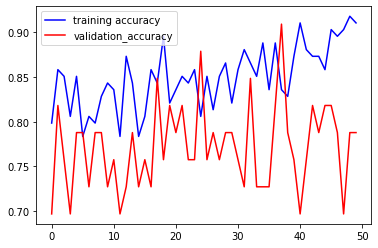

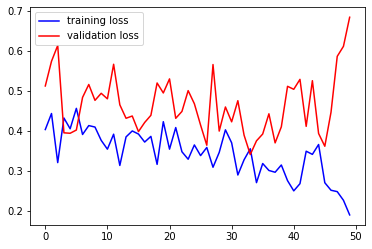

In [64]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'b', label='training accuracy')
plt.plot(epochs, val_accuracy, 'r', label = 'validation_accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'b' , label = 'training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.legend()
plt.show()